##Titanic Data
#### Analysis done by:  Taif Nono / Samiha Youssef


- Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- Name: Name of passenger
- Sex: Sex of the passenger
- Age: Age of the passenger (Some entries contain NaN)
- SibSp: Number of siblings and spouses of the passenger aboard
- Parch: Number of parents and children of the passenger aboard
- Ticket: Ticket number of the passenger
- Fare: Fare paid by the passenger
- Cabin Cabin number of the passenger (Some entries contain NaN)
- Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)
- (Target variable) Survived: Outcome of survival (0 = No; 1 = Yes)

In [50]:
import pandas as pd
import numpy as np

In [51]:
df = pd.read_csv('Titanic - train.csv')

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
shape = df.shape
shape

(891, 12)

In [54]:
df.Parch.unique() #discrete

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [55]:
df.SibSp.unique() #discrete

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [56]:
df.Embarked.unique() #discrete

array(['S', 'C', 'Q', nan], dtype=object)

In [57]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
features = df.drop(['Survived','PassengerId', 'Name','Ticket'], axis = 1)
survival = df['Survived']

In [60]:
features.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [61]:
features.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [62]:
s = df[df["Survived"] == 1]
print("% of Survival", len(s)/shape[0]*100)

print('Total passengers survived: ', s.count()[0])
median_age_survived = s['Age'].median()
print("Median age survived:", median_age_survived)


print(df.groupby('Survived')['Sex'].count())


print("Female Survived", len(s[s.Sex == "female"]) )
print("Male Survived", len(s[s.Sex == "male"]) )


#print(df.groupby('Survived')['Cabin'].count())
print("Number of cabins: ", len(s['Cabin'].unique()))


% of Survival 38.38383838383838
Total passengers survived:  342
Median age survived: 28.0
Survived
0    549
1    342
Name: Sex, dtype: int64
Female Survived 233
Male Survived 109
Number of cabins:  102


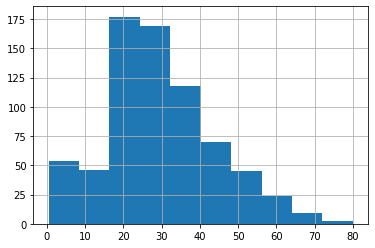

In [63]:
#Age
features.Age.hist();

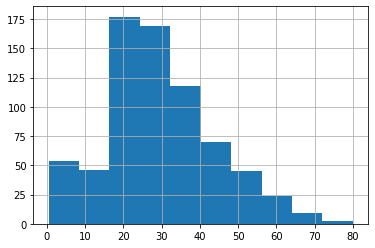

In [64]:
#Filling na
features['Age'].fillna(df.mean(), inplace = True)
features.Age.hist();

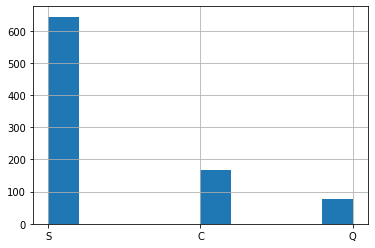

In [65]:
features.Embarked.hist();

In [66]:
emb_mode = df['Embarked'].mode()
print(emb_mode[0])
features["Embarked"].fillna(emb_mode[0], inplace = True)

S


In [67]:
#Difference can be spotted

In [68]:
features.fillna(0, inplace = True)

In [69]:
features.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [70]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,0,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,0,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,0,S


# Preprocessing the data

In [71]:
from sklearn.preprocessing import StandardScaler
features.drop(['Cabin'], axis = 1, inplace = True)
scaler = StandardScaler() 

discrete = ['Embarked', 'Sex', 'Pclass']

features = pd.get_dummies(features, columns = discrete)
# second: apply the scaler to the numerical columns on the data:
numerical = ['Age', 'SibSp', 'Parch', 'Fare']
features[numerical] = scaler.fit_transform(features[numerical])


In [72]:
features[numerical].head(5)

,Age,SibSp,Parch,Fare
0,-0.102313,0.432793,-0.473674,-0.502445
1,0.807492,0.432793,-0.473674,0.786845
2,0.125138,-0.474545,-0.473674,-0.488854
3,0.636903,0.432793,-0.473674,0.420730
4,0.636903,-0.474545,-0.473674,-0.486337


In [78]:
features.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3'],
      dtype='object')

# # Training Model

In [74]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, survival, test_size=0.2, random_state=40)

In [75]:
#import the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

#fit the model to the data
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
# Making predictions on scaling data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
# Calculate the accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.9831460674157303
The test accuracy is 0.8100558659217877


# # Improving the model

In [79]:
#grid search
#import gridsearch
from sklearn.model_selection import GridSearchCV

#set the classifier model
rfc = RandomForestClassifier(random_state=40)
#set the parameters:
parameters = {'max_depth': [1,2,3,4,5,6], 'min_samples_leaf': [1,6,7,8,9,10], 'min_samples_split': [5, 6, 7, 8, 9, 10]}
#define the score method using make_scorer()
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
scorer = make_scorer(accuracy_score)

#define gridsearchcv function with cv=3
grid_obj = GridSearchCV(rfc, parameters, scoring=scorer, cv=3, n_jobs=-1)
#fit/ train the function/ object
grid_fit = grid_obj.fit(X_train, y_train)
#get the best estimtor model
best_rfc = grid_fit.best_estimator_

# Make predictions using the new model.
y_train_pred = best_rfc.predict(X_train)
y_test_pred = best_rfc.predict(X_test)

In [80]:
# Calculating accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.8553370786516854
The test accuracy is 0.8379888268156425


In [81]:
# best model parameters
best_rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

# # predicting

In [82]:
testing_data = pd.read_csv('Titanic - Test.csv')

In [83]:
testing_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [84]:
testing_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [85]:
def model(best_rfc, df, x_train, y_train):
    
    features = df.drop(['PassengerId', 'Name','Ticket'], axis = 1)
    #survival = df['Survived']
    
    median_age = df['Age'].median()
    features['Age'].fillna(median_age, inplace = True)
    
    emb_mode = df['Embarked'].mode()
    features["Embarked"].fillna(emb_mode[0], inplace = True)
    
    features.fillna(0, inplace = True)
    
    from sklearn.preprocessing import StandardScaler
    features.drop(['Cabin'], axis = 1, inplace = True)
    scaler = StandardScaler() 
    
    discrete = ['Embarked', 'Sex', 'Pclass']
    features = pd.get_dummies(features, columns = discrete)
    
    # second: apply the scaler to the numerical columns on the data:
    numerical = ['Age', 'SibSp', 'Parch', 'Fare']
    features[numerical] = scaler.fit_transform(features[numerical])
    
    
    model = best_rfc
    model.fit(x_train, y_train)
    predictions_test = model.predict(features)
    predictions_train = model.predict(X_train)
    

    
    return predictions_test


In [86]:
predictions = model(best_rfc,testing_data,features, survival)

In [87]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,